In [1]:
import pickle
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

In [2]:
noise_list = ['15%', '12.5%', '10%', '7.5%', '5%', '2.5%']
thresold_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
noise = []
threshold = []
for x in noise_list:
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)
    noise.append(x)

for y in range(6):
    for t in thresold_list:
        threshold.append(t)

In [55]:
rf_acc = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])
isf_acc = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])

In [56]:
rf_acc['Noise'] = noise
rf_acc['Threshold'] = threshold
rf_acc['Value'] = 0

isf_acc['Noise'] = noiseT
isf_acc['Threshold'] = threshold
isf_acc['Value'] = 0

In [57]:

rf_acc.loc[:5,'Value']=[0.824767786,0.803483438,0.753699217,0.696683445,0.646518455,0.605625496]
rf_acc.loc[6:11,'Value']=[0.841032111,0.816187803,0.772598312,0.730528138,0.687950482,0.648791887]
rf_acc.loc[12:17,'Value']=[0.84891448,0.82767675,0.786767126,0.741216713,0.703565948,0.667743139]
rf_acc.loc[18:23,'Value']=[0.87603563,0.854817437,0.82063231,0.782741507,0.750300161,0.715719678]
rf_acc.loc[24:29,'Value']=[0.889730301,0.870280857,0.839334698,0.807436723,0.774635516,0.744953627]
rf_acc.loc[30:35,'Value']=[0.922333528,0.907877397,0.885474498,0.865338369,0.844416877,0.815253927]


In [58]:
isf_acc.loc[:5,'Value']=[0.795267421,0.797142049,0.790767343,0.78548947,0.782299991,0.772453927]
isf_acc.loc[6:11,'Value']=[0.835372785,0.831027408,0.82491974,0.813367021,0.803708407,0.786674029]
isf_acc.loc[12:17,'Value']=[0.847621293,0.84588664,0.838392726,0.82711198,0.814015045,0.797640407]
isf_acc.loc[18:23,'Value']=[0.899140857,0.893645968,0.8831696,0.868464936,0.849984263,0.827760628]
isf_acc.loc[24:29,'Value']=[0.924593212,0.917742544,0.903937629,0.888634547,0.861680802,0.83553673]
isf_acc.loc[30:35,'Value']=[0.965067932,0.950926913,0.926813155,0.895892183,0.861379623,0.828425167]


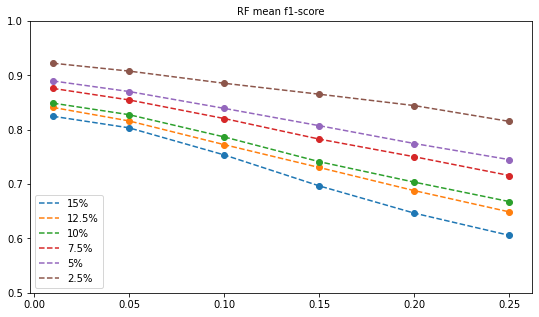

In [93]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = rf_acc[rf_acc['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('RF mean f1-score',fontsize=10)
plt.ylim([0.5,1])
plt.legend()
plt.show()

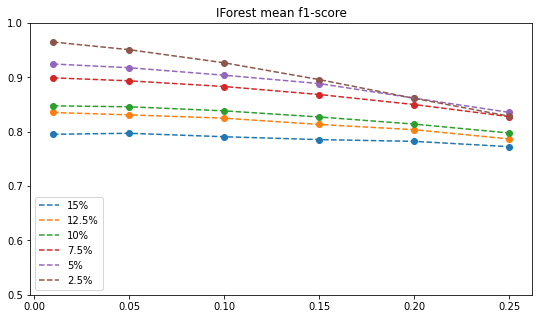

In [60]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = isf_acc[rf_acc['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('IForest mean f1-score')
plt.ylim([0.5,1])
plt.legend()
plt.show()

In [61]:
tnr_df = pd.DataFrame(columns=['Noise', 'RF', 'IF'])
tpr_df = pd.DataFrame(columns=['Noise', 'RF', 'IF'])

In [62]:
tnr_df['Noise'] = noise_list
tpr_df['Noise'] = noise_list

In [63]:
tnr_df['RF'] = [0.540618956,0.604527297,0.585215606,0.638253638,0.708074534,0.729508197]
tnr_df['IF'] = [0.01476378,0.017832647,0.010504202,0.014861996,0.015873016,0.016806723]

tpr_df['RF'] = [0.856036662,0.846733668,0.854714785,0.860964912,0.863311688,0.885990814]
tpr_df['IF'] = [0.989346247,0.989197531,0.991397849,0.988389402,0.992391664,0.987310068]


Text(0.5, 1.0, 'TNR result')

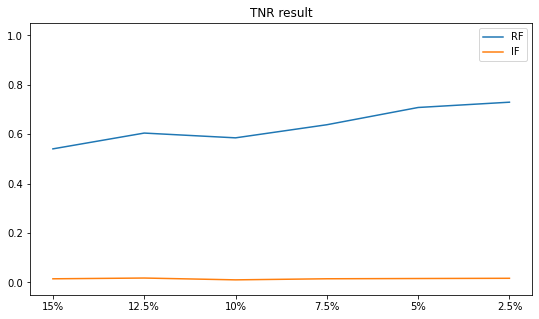

In [120]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(tnr_df['Noise'],tnr_df['RF'], label='RF')
plt.plot(tnr_df['Noise'],tnr_df['IF'], label='IF')
plt.legend()
plt.ylim(-0.05,1.05)
plt.title('TNR result')


In [125]:
fpr_rf = []
fpr_if = []
for pos, t in enumerate(list(tnr_df['RF'])):
    fpr_rf.append(1-t)
    fpr_if.append(1- list(tnr_df['IF'])[pos])
tnr_df['RF_FPR'] = fpr_rf
tnr_df['IF_FPR'] = fpr_if

Text(0.5, 1.0, 'TNR & FPR')

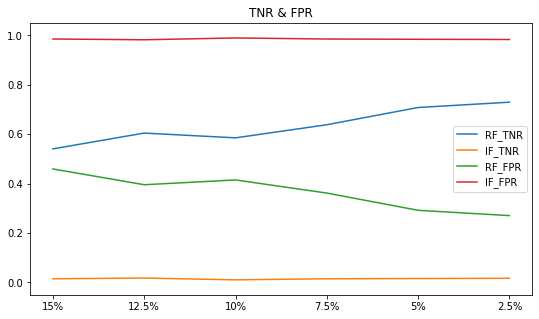

In [127]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(tnr_df['Noise'],tnr_df['RF'], label='RF_TNR')
plt.plot(tnr_df['Noise'],tnr_df['IF'], label='IF_TNR')

plt.plot(tnr_df['Noise'],tnr_df['RF_FPR'], label='RF_FPR')
plt.plot(tnr_df['Noise'],tnr_df['IF_FPR'], label='IF_FPR')

plt.legend()
plt.ylim(-0.05,1.05)
plt.title('TNR & FPR')


In [35]:
npv_df = pd.DataFrame(columns=['Noise', 'RF', 'IF'])
npv_df['Noise'] = noise_list
npv_df['RF'] = [0.380272109,0.331628926,0.313531353,0.244038156,0.213084112,0.113520408]
npv_df['IF'] = [0.2,0.171052632,0.1,0.08045977,0.115384615,0.025641026]

Text(0.5, 1.0, 'NPV result')

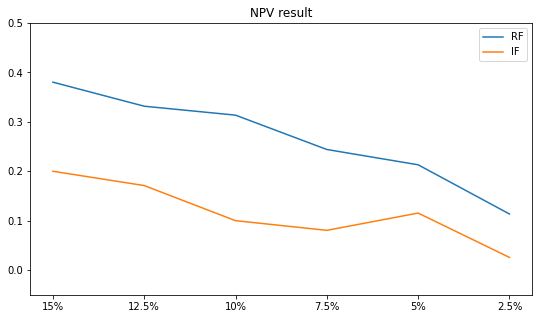

In [37]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(npv_df['Noise'],npv_df['RF'], label='RF')
plt.plot(npv_df['Noise'],npv_df['IF'], label='IF')
plt.legend()
plt.ylim(-0.05,0.5)
plt.title('NPV result')


In [39]:
rf_npv = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])
isf_npv = pd.DataFrame(columns= ['Noise', 'Threshold', 'Value'])

In [40]:
rf_npv['Noise'] = noise
rf_npv['Threshold'] = threshold
rf_npv['Value'] = 0

isf_npv['Noise'] = noise
isf_npv['Threshold'] = threshold
isf_npv['Value'] = 0

In [44]:
rf_npv.loc[:5,'Value']=[0.380272109,0.358583595,0.312201772,0.274015302,0.249874812,0.233910035]
rf_npv.loc[6:11,'Value']=[0.331628926,0.313043478,0.275641026,0.246726396,0.222836096,0.206655481]
rf_npv.loc[12:17,'Value']=[0.313531353,0.301784329,0.264812576,0.231825114,0.211433757,0.196694215]
rf_npv.loc[18:23,'Value']=[0.244038156,0.233550682,0.204672897,0.177254902,0.160776161,0.146848805]
rf_npv.loc[24:29,'Value']=[0.213084112,0.202467344,0.173938336,0.152109912,0.134615385,0.12177264]
rf_npv.loc[30:35,'Value']=[0.113520408,0.110542477,0.094262295,0.082220661,0.074709124,0.064176749]


isf_npv.loc[:5,'Value']=[0.2,0.227467811,0.189376443,0.191489362,0.211559433,0.214459789]
isf_npv.loc[6:11,'Value']=[0.171052632,0.158301158,0.173228346,0.159059474,0.160944206,0.152950956]
isf_npv.loc[12:17,'Value']=[0.1,0.149659864,0.148148148,0.1416122,0.140378549,0.142348754]
isf_npv.loc[18:23,'Value']=[0.08045977,0.129251701,0.137745975,0.130277443,0.11615245,0.104477612]
isf_npv.loc[24:29,'Value']=[0.115384615,0.123893805,0.111353712,0.100591716,0.083333333,0.070161912]
isf_npv.loc[30:35,'Value']=[0.025641026,0.036764706,0.038062284,0.028169014,0.023328149,0.021078735]


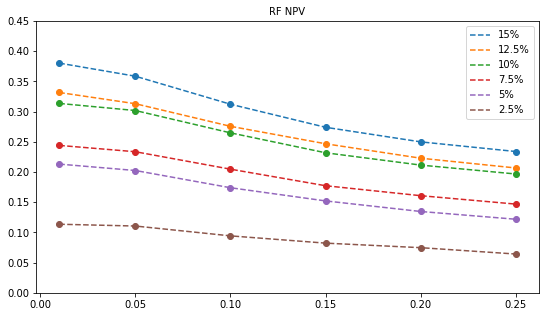

In [51]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = rf_npv[rf_npv['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('RF NPV',fontsize=10)
plt.ylim([0,0.45])
plt.legend()
plt.show()

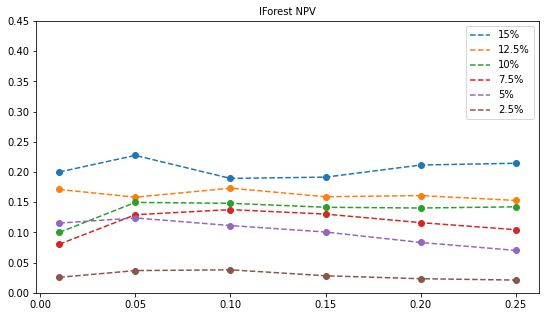

In [52]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

for n in noise_list:
    x = isf_npv[isf_npv['Noise'] == n]
    plt.scatter(x['Threshold'],x['Value'])
    plt.plot(x['Threshold'],x['Value'], '--', label=n)
plt.title('IForest NPV',fontsize=10)
plt.ylim([0,0.45])
plt.legend()
plt.show()

In [142]:
fnr_rf = []
fnr_if = []
for pos, t in enumerate(list(tpr_df['RF'])):
    fnr_rf.append(1-t)
    fnr_if.append(1- list(tpr_df['IF'])[pos])
tpr_df['RF_FNR'] = fnr_rf
tpr_df['IF_FNR'] = fnr_if

Text(0.5, 1.0, 'TPR & FNR')

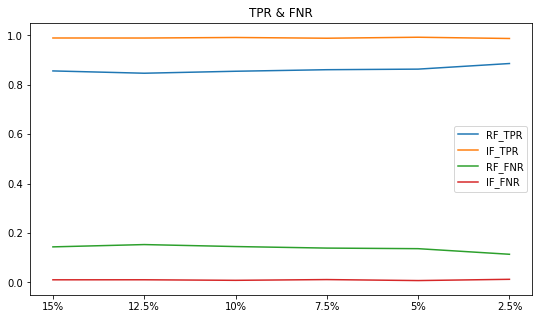

In [146]:
fig = plt.gcf()

fig.set_size_inches(9, 5)

plt.plot(tpr_df['Noise'],tpr_df['RF'], label='RF_TPR')
plt.plot(tpr_df['Noise'],tpr_df['IF'], label='IF_TPR')

plt.plot(tpr_df['Noise'],tpr_df['RF_FNR'], label='RF_FNR')
plt.plot(tpr_df['Noise'],tpr_df['IF_FNR'], label='IF_FNR')

plt.legend()
plt.ylim(-.05,1.05)

plt.title('TPR & FNR')


In [18]:
rf_accwindow = pd.DataFrame(columns=['Noise','30','50','100'])
rf_accwindow['Noise'] = noise_list

In [31]:
rf_accwindow['30'] = [0.764649768,0.78028043,0.784050367,0.8,0.812403341,0.83642523,]
rf_accwindow['50'] = [0.81,0.82,0.83,0.85,0.86,0.88]
rf_accwindow['100'] =[0.854477612,0.874390987,0.871285012,0.898947951,0.90128688,0.917917755]

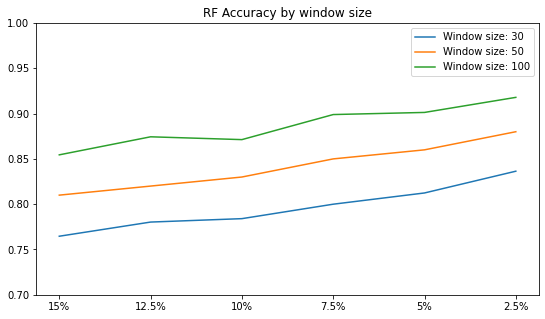

In [32]:
fig = plt.gcf()

fig.set_size_inches(9, 5)
for x in ['30','50','100']:
    plt.plot(rf_accwindow['Noise'], rf_accwindow[x], label = 'Window size: %s'%(x))
plt.ylim(0.7,1)
plt.legend()
plt.title('RF Accuracy by window size')
plt.show()

In [21]:
rf_f1window = pd.DataFrame(columns=['Noise','30','50','100'])

rf_f1window['Noise'] = noise_list

rf_f1window['30'] = [0.791049387,0.813798073,0.819151625,0.845289532,0.861613882,0.894600129]
rf_f1window['50'] = [0.825,0.841,0.849,0.876,0.890,0.922]
rf_f1window['100'] =[0.854861264,0.880881613,0.880328117,0.911846179,0.919562083,0.942896162]

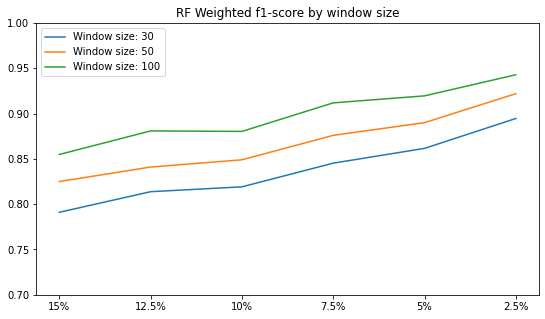

In [22]:
fig = plt.gcf()

fig.set_size_inches(9, 5)
for x in ['30','50','100']:
    plt.plot(rf_f1window['Noise'], rf_f1window[x], label = 'Window size: %s'%(x))
plt.ylim(0.7,1)
plt.legend()
plt.title('RF Weighted f1-score by window size')
plt.show()

In [23]:
isf_accwindow = pd.DataFrame(columns=['Noise','30','50','100'])

isf_accwindow['Noise'] = noise_list

isf_accwindow['30'] = [0.852423208,0.880991489,0.885852428,0.920883039,0.942397027,0.967048942]
isf_accwindow['50'] = [0.85,0.88,0.92,0.89,0.94,0.97]
isf_accwindow['100'] =[0.85392482,0.880481121,0.892666239,0.928571429,0.947269303,0.970626632]

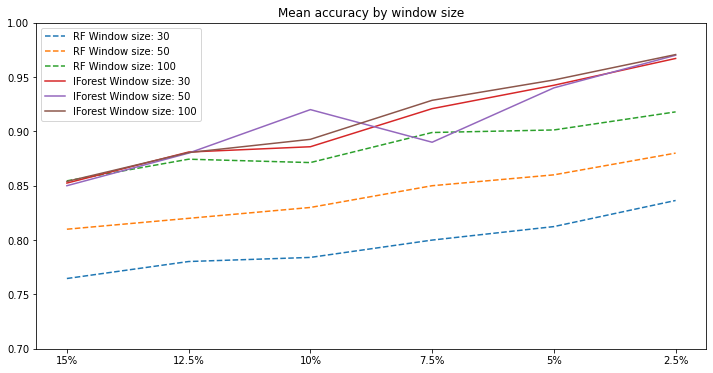

In [30]:
fig = plt.gcf()

fig.set_size_inches(12, 6)
for x in ['30','50','100']:
    plt.plot(rf_accwindow['Noise'], rf_accwindow[x], '--', label = 'RF Window size: %s'%(x))
for x in ['30','50','100']:
    plt.plot(isf_accwindow['Noise'], isf_accwindow[x], label = 'IForest Window size: %s'%(x))
plt.ylim(0.7,1)
plt.legend()
plt.title('Mean accuracy by window size')
plt.show()

In [28]:
isf_f1window = pd.DataFrame(columns=['Noise','30','50','100'])

isf_f1window['Noise'] = noise_list

isf_f1window['30'] = [0.794680369,0.834871894,0.844409098,0.897693853,0.923183736,0.964061185]
isf_f1window['50'] = [0.795,0.835,0.848,0.899,0.925,0.965]
isf_f1window['100'] =[0.795086312,0.834105019,0.848255045,0.902202731,0.92623233,0.966224901]

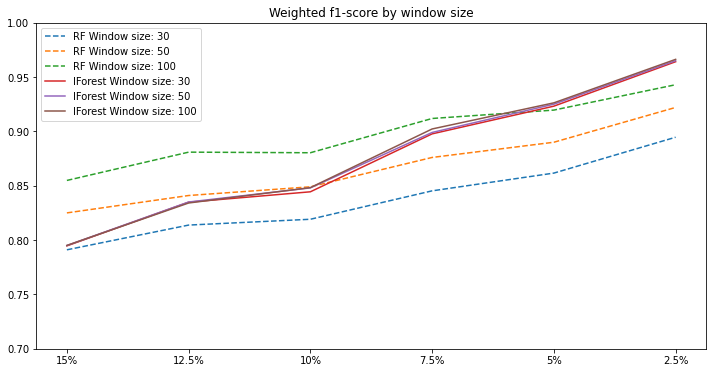

In [29]:
fig = plt.gcf()

fig.set_size_inches(12, 6)
for x in ['30','50','100']:
    plt.plot(rf_f1window['Noise'], rf_f1window[x], '--', label = 'RF Window size: %s'%(x))
for x in ['30','50','100']:
    plt.plot(isf_f1window['Noise'], isf_f1window[x], label = 'IForest Window size: %s'%(x))
plt.ylim(0.7,1)
plt.legend()
plt.title('Weighted f1-score by window size')
plt.show()

In [53]:
rf_npvwindow = pd.DataFrame(columns=['Noise','30','50','100'])
rf_npvwindow['Noise'] = noise_list

rf_npvwindow['30'] = [0.318537859,0.290023202,0.26695279,0.198895028,0.16802974,0.086270872]
rf_npvwindow['50'] = [0.380272109,0.331628926,0.313531353,0.244038156,0.213084112,0.113520408]
rf_npvwindow['100'] =[0.485024155,0.449570815,0.405731523,0.34751773,0.294436906,0.157423971]

isf_npvwindow = pd.DataFrame(columns=['Noise','30','50','100'])

isf_npvwindow['Noise'] = noise_list

isf_npvwindow['30'] = [0.195121951,0.157142857,0.032258065,0.069565217,0.050847458,0.011904762]
isf_npvwindow['50'] = [0.2,0.171052632,0.1,0.08045977,0.115384615,0.025641026,]
isf_npvwindow['100'] =[0.23880597,0.102941176,0.096774194,0.14516129,0.161290323,0.03125]

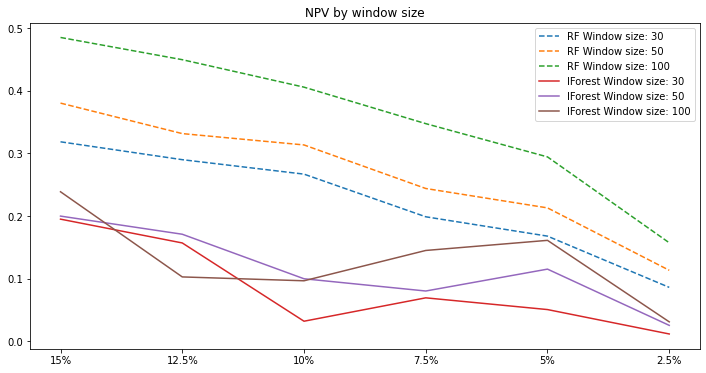

In [54]:
fig = plt.gcf()

fig.set_size_inches(12, 6)
for x in ['30','50','100']:
    plt.plot(rf_npvwindow['Noise'], rf_npvwindow[x], '--', label = 'RF Window size: %s'%(x))
for x in ['30','50','100']:
    plt.plot(isf_npvwindow['Noise'], isf_npvwindow[x], label = 'IForest Window size: %s'%(x))
# plt.ylim(0.7,1)
plt.legend()
plt.title('NPV by window size')
plt.show()